# An other and more extensive example on machine learning

BMED360-2021  `02-extensive-example.ipynb`

<a href="https://colab.research.google.com/github/computational-medicine/BMED360-2021/tree/main/Lab2-ML-tissue-classification/02-extensive-example.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

## Learning outcome:

We will build on the learninmg fra the Iris dataset and repeat the procedure on another benchmark data set: Diabetes Data Set. You'll find a description of the data set together with a link to the data here: https://www.kaggle.com/uciml/pima-indians-diabetes-database. The data set is also available here: https://assets.datacamp.com/production/course_1939/datasets/diabetes.csv.

### For using Colab
**--> (some of) the following libraries must be `pip installed` (i.e. uncommet these among the following pip commands):**

In [2]:
# These might not be necessary to pip install on colab:
#!pip install matplotlib
#!pip install gdown
#!pip install sklearn

**Download zipped data from Google Drive using** [`gdown`](https://github.com/wkentaro/gdown)

In [3]:
import gdown
import shutil
import os
import sys

In [4]:
# Download zip-file if ./assets does not exist (as when running in Colab)

if os.path.isdir('./assets') == False:
    
    ## Download assets.zip for Google Drive        
    # https://drive.google.com/file/d/18lUwfxqtWD6BB9WiQKzzSr6RoBcysSqr/view?usp=sharing       
    file_id = '18lUwfxqtWD6BB9WiQKzzSr6RoBcysSqr'
    url = 'https://drive.google.com/uc?id=%s' % file_id
    output = './assets.zip'
    gdown.download(url, output, quiet=False)
    
    ## Unzip the assets file into `./assets`
    shutil.unpack_archive(output, '.')
    
    ## Delete the `assets.zip` file
    os.remove(output)
else:
    print(f'./assets  exists already!')

./assets  exists already!


In [5]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns 
import sklearn # scikit-learn for most ML work (except for deep learning)
%matplotlib inline

In [6]:
print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)
print('Numpy version ' + np.__version__)
print('Matplotlib version ' + matplotlib.__version__)
print('Seaborn version ' + sns.__version__)
print('Scikit-learn version ' + sklearn.__version__)

Python version 3.8.0 | packaged by conda-forge | (default, Nov 22 2019, 19:11:19) 
[Clang 9.0.0 (tags/RELEASE_900/final)]
Pandas version 1.2.4
Numpy version 1.19.5
Matplotlib version 3.4.1
Seaborn version 0.11.1
Scikit-learn version 0.24.1


In [7]:
# To make the notebook reproducible, we set the random seed
np.random.seed(42)

Load, explore and prepare the data
Let's repeat the procedure on another benchmark data set: Diabetes Data Set. You'll find a description of the data set together with a link to the data here: https://www.kaggle.com/uciml/pima-indians-diabetes-database. The data set is also available here: https://assets.datacamp.com/production/course_1939/datasets/diabetes.csv.

We download the data using urllib, and store the file in the directory ./data

We download the data using `urllib`, and store the file in the directory `./data`

In [9]:
import urllib.request

In [10]:
url = 'https://assets.datacamp.com/production/course_1939/datasets/diabetes.csv'

In [11]:
# Create directory to store data
import os
if not os.path.exists('data'):
    os.makedirs('data')

In [12]:
urllib.request.urlretrieve(url, 'data/diabetes.csv')

('data/diabetes.csv', <http.client.HTTPMessage at 0x7fce104c0c70>)

As usual, we use Pandas to inspect and process text data:

In [13]:
diabetes = pd.read_csv('data/diabetes.csv')

In [14]:
diabetes

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


It's all numbers, and all the samples contain values for all the features (there are 768 non-NaN values). 

We notice that there are eight feature columns and one target column (diabetes).

More information about the data can be found using `describe` and `info`:

Here's a description of each feature (from <a href="https://www.kaggle.com/uciml/pima-indians-diabetes-database">Kaggle</a>):
- Pregnancies: number of times pregnant
- Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- Diastolic: Diastolic blood pressure (mm Hg)
- Triceps: Triceps skin fold thickness (mm)
- Insulin: 2-hour serum insulin (mu U/ml)
- BMI: Body mass index (weight in kg/(height in m)^2)
- DPF: Diabetes pedigree function
- Age: Age (years)
- Diabetes: Class variable (0 or 1)

In [ ]:
diabetes.describe()

In [ ]:
diabetes.info()

As before we can visualize the connection between the features in a scatter plot, where each sample is colored by whether it belongs to a diabetic persons or not:

In [ ]:
pd.plotting.scatter_matrix(diabetes, c=diabetes['diabetes'], figsize=(15,15), marker='o', s=20)
plt.show()

We observe that this seems like a tougher problem than Iris. Still, let's follow the same procedure:

### Select which features to use

... this time we'll use all the features to construct our model. We let $X$ consist of all columns except the target $y$ `diabetes`:

In [ ]:
X = diabetes[diabetes.columns[0:-1]]    

In [ ]:
X.head()

The target variable is in the `diabetes` column. `1` means diabetes, `0` not diabetes.

In [ ]:
y = diabetes['diabetes']

In [ ]:
y.head()

**Ex 1.4. Get dataframe containing number of subjects with non-diabetes (label=0) and with diabetes (label=1)** <br>
Hint: Return a Series containing counts of unique values.

In [ ]:
# %load solutions/ex1_4.py
labels = pd.Index(y)
df = pd.DataFrame(labels.value_counts())
df.columns = ['Number']
df = df.rename_axis(index='Diabetes')
df

### Training and test data

We split into training and test sets:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Further study of diabetes: understanding the model's predictions

An important part of constructing good machine learning models is inspecting what the model has learned. How it weighs the various features when making its decisions in specific cases, how it would react if the features were different in some interesting ways, and so on. This is useful both for improving the models and the input data, and, sometimes, to get a better understanding of the problem the model tries to solve (here's a very interesting example of this [img1](assets/stanford_1.png), [img2](assets/stanford_2.png), from [here](https://www.nature.com/articles/s41746-018-0029-1). This has been discussed in our ELMED219 course [here](https://github.com/MMIV-ML/ELMED219-2021/tree/main/Lab1-HealthRecords).

For example, what features are the most, and least, important for our diabetes classifier? What's the relation between BMI and diabetes according to our model? 

## Feature importance

When using random forests it's possible to compute how much each feature influenced the predictions. The so-called **feature importance**. We'll learn more about this later. 

In [ ]:
importances = rf.feature_importances_

In [ ]:
importances

In [ ]:
# Find index of those with highest importance, sorted from largest to smallest:
indices = np.argsort(importances)[::-1]

In [ ]:
for f in range(X.shape[1]): 
    print(f'{X.columns[indices[f]]}: {np.round(importances[indices[f]],2)}')

The glucose level has the largest explanatory value, followed by BMI. It's not hard to imagine that this kind of information is very useful in practice! However, it is something that **must be used carefully**, as the feature importances from a single model can be quite misleading. If you have a look at how random forests work, how they are constructed from quite brittle decision trees, you'll understand why this is the case.

## Permutation importance

Feature importances in the random forest classification models of scikit-learn is based on measuring how efficient each feature is in reducing uncertainty (the so-called *impurity* in random forests). Often this results in an incorrect estimate of how important each feature actually is (see https://explained.ai/rf-importance/index.html for a deep-dive into this). 

A more robust technique is what's called **permutation importance**. 

The idea is that if a feature is important for the predictions of a trained model then a random shuffling of the data in the corresponding column should drastically reduce the accuracy of the model. On the other hand, a random shuffling of an unimportant feature shouldn't impact the model much. 

The `eli5` library has an implementation of this idea, compatible with scikit-learn models:<br>
(_ELI5 is short for "Explain Like I'm 5," a request for a simple explanation to a complicated question or problem_)

In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

In [ ]:
perm = PermutationImportance(rf, random_state=42).fit(X_test, y_test)

In [ ]:
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

We observe that `glucose` is the most important feature by far. If you shuffle `glucose` the model accuracy decreases by more than 10 percentage points. The four features that had negative weights were useless for the predictions: in fact, if you shuffle these at random you will sometimes obtain slightly *better* accuracy!

## Partial dependence plots (PDP)

PDP is another useful way to understand and explain predictions made by machine learning algorithms.

When using black box machine learning algorithms like random forest and boosting, it is hard to understand the relations between predictors and model outcome. For example, in terms of random forest, all we get is the feature importance. Although we can know which feature is significantly influencing the outcome based on the importance calculation, it really sucks that we don’t know in which direction it is influencing. And in most of the real cases, the effect is _non-monotonic_. We need some powerful tools to help understanding the complex relations between predictors and model prediction.

The idea is to plot predictions while increasing a specified feature. For example, what happens to the predicted probability for diabetes as the glucose level increases? As this is an important feature we expect it to change quite a bit (in fact, since we're talking about diabetes we expect the probability to increase). And what about unimportant features like age? 

We can use the PDPbox library, which is compatible with scikit-learn (see https://pdpbox.readthedocs.io/en/latest for details):

In [ ]:
from pdpbox import pdp

In [ ]:
pdp_goals = pdp.pdp_isolate(model=rf, dataset=X_test, model_features=X_test.columns.tolist(), feature='glucose')

In [ ]:
pdp.pdp_plot(pdp_goals, 'glucose')
plt.xlabel('Plasma glucose concentration a 2 hours in an oral glucose tolerance test')
plt.ylabel('Probability of diabetes')
plt.show()

We see that as the glucose level increases the predicted probability for diabetes increases. 

**What about BMI**?

In [ ]:
pdp_goals = pdp.pdp_isolate(model=rf, dataset=X_test, model_features=X_test.columns.tolist(), feature='bmi')
pdp.pdp_plot(pdp_goals, 'bmi')
plt.xlabel('BMI')
plt.ylabel('Probability of diabetes')
plt.show()

Same for BMI. The plot for age demonstrates why this feature is deemed unimportant: the probability increases a bit at the beginning (low ages), but then it actually decreases. 

**... and age**?

In [ ]:
pdp_goals = pdp.pdp_isolate(model=rf, 
                            dataset=X_test, 
                            model_features=X_test.columns.tolist(),
                            num_grid_points=20,
                            feature='age')
pdp.pdp_plot(pdp_goals, 'age')
plt.xlabel('Age (yrs)')
plt.ylabel('Probability of diabetes')
plt.show()

### Two-dimensional PDP

Typically it's the interaction among several features that influences model predictions, not each feature independently. By plotting two-dimensional interaction plots one can get a better understanding of how the features influence the predictions:

In [ ]:
features = ['glucose', 'bmi']
interact  =  pdp.pdp_interact(model=rf, dataset=X_test, model_features=X_test.columns.tolist(), features=features)

pdp.pdp_interact_plot(pdp_interact_out=interact, feature_names=features, plot_type='grid')
plt.show()

> **NOTE:** Of course, all these conclusions depend on the exact data set that we have used. To make any real inferences about diabets and its relation to glucose level, BMI, age etc one would need a carefully designed (and large) data set. 

# Exercises for further learning

> **Your turn!**
- Get the feature importances for the Iris predictions. Is it sepal length or width that provides the most information?
- Construct another random forest by changing the `random_state`. What happens to the accuracy? What happens to the feature imporances?
- Try to create a better random forest by tuning the parameters. If you want to dive deep, use `grid_search` (http://scikit-learn.org/stable/modules/grid_search.html) to automatically find good parameters. 
- Try another classification model. 
- **Extra challenge**: Here's another well-prepared data set: https://assets.datacamp.com/production/course_1939/datasets/auto.csv. Download it and repeat the procedure above. This time the goal is to predict the country of origin of a car given various features. 

# Another example

Vi repeterer prosedyren over på et annet velkjent benchmark-datasett: **Diabetes Data Set**.

Du finner en beskrivelse av datasettet her: https://www.kaggle.com/uciml/pima-indians-diabetes-database. Det er også tilgjengelig via https://assets.datacamp.com/production/course_1939/datasets/diabetes.csv. 

I maskinlæring er en stor del av jobben å organisere data og lage gode features. Vi skal snakke mer om dette senere; foreløpig hopper vi over temaet og bruker et ferdig tilrettelagt (og derfor ikke særlig realistisk) datasett. 

## Read and explore the data

Vi kan laste inn data med `urllib`, og lagre filen i katalogen `./data`:

In [48]:
import urllib.request

url = 'https://assets.datacamp.com/production/course_1939/datasets/diabetes.csv'

# Lag katalog for å lagre data:
import os
if not os.path.exists('data'):
    os.makedirs('data')
    
# Last ned
urllib.request.urlretrieve(url, 'data/diabetes.csv')

('data/diabetes.csv', <http.client.HTTPMessage at 0x7fd50a123750>)

Vi bruker som vanlig Pandas til å laste inn data:

In [49]:
diabetes = pd.read_csv('data/diabetes.csv')

In [50]:
diabetes.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [51]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pregnancies  768 non-null    int64  
 1   glucose      768 non-null    int64  
 2   diastolic    768 non-null    int64  
 3   triceps      768 non-null    int64  
 4   insulin      768 non-null    int64  
 5   bmi          768 non-null    float64
 6   dpf          768 non-null    float64
 7   age          768 non-null    int64  
 8   diabetes     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Vi ser at det er åtte feature-søyler og én target (diabetes).

Vi kan få mer informasjon med `describe`-metoden:

In [52]:
diabetes.describe()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Vi ser at alle features er numeriske, og at det ikke er none manglende verdier (missing values). 

Her er en kort beskrivelse av hver feature, sakset fra Kaggle-lenken over:

- Pregnancies: number of times pregnant
- Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- Diastolic: Diastolic blood pressure (mm Hg)
- Triceps: Triceps skin fold thickness (mm)
- Insulin: 2-hour serum insulin (mu U/ml)
- BMI: Body mass index (weight in kg/(height in m)^2)
- DPF: Diabetes pedigree function
- Age: Age (years)
- Diabetes: Class variable (0 or 1)

Som før kan vi visualisere sammenhenger mellom features i scatter plots og histogram. Vi farger hver sample ved å bruke hvorvidt det tilhører en diabetiker eller ikke:

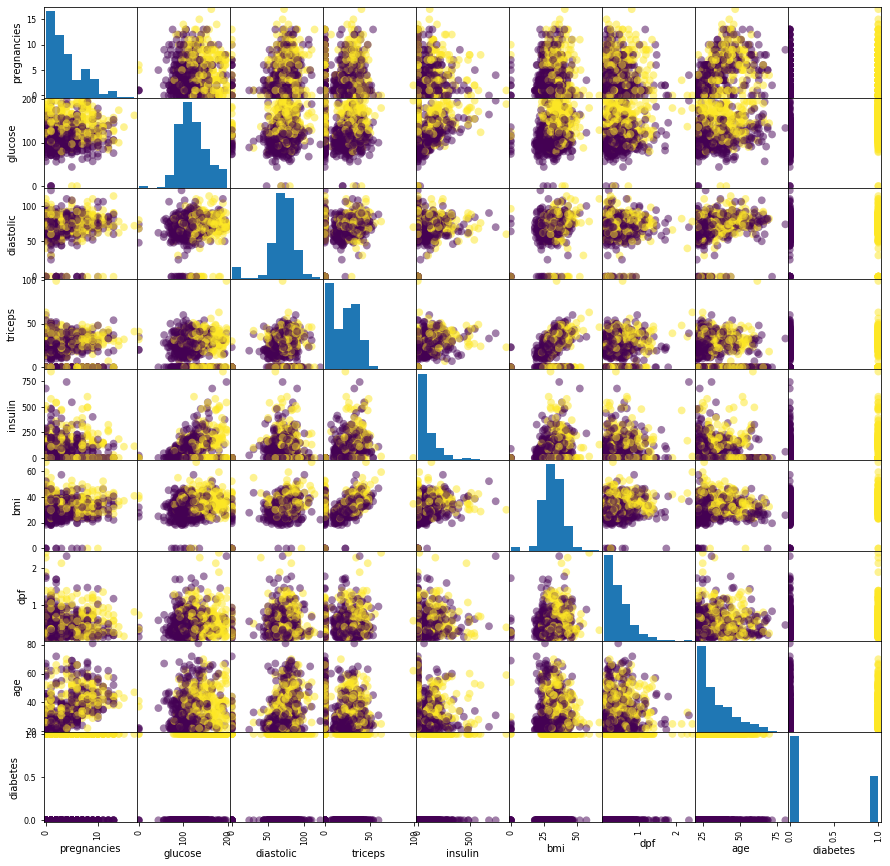

In [53]:
pd.plotting.scatter_matrix(diabetes, c=diabetes['diabetes'], figsize=(15,15), marker='o', s=60)
plt.show()

Å klassifisere basert på dette datasettet ser vesentlig vanskeligere ut enn for Iris. 

In [54]:
# Vi lar X bestå av alle søyler bortsett fra siste (i.e. alle features)
X = diabetes[diabetes.columns[0:-1]]
# ..og lar y være target
y = diabetes['diabetes']

In [55]:
X.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [56]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: diabetes, dtype: int64

## Training and test datasets

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## Machine learning model

Vi bruker en random forest-klassifikator:

In [58]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

## Model (performance) evaluation

Vi produserer prediksjoner på testdata og beregner treffsikkerheten:

In [59]:
y_pred = rf.predict(X_test)
accuracy_score(y_test, y_pred)

0.734375

Med denne modellen kan vi altså predikere diabetes fra de gitte features i det gitte datasettet med en treffiskkerhet på 73.4%.

<span style="font-size:200%; color:blue">Machine learning models are rather generic!</span>

> **Viktig!** Legg merke til at vi angrep diabetes-data på akkurat samme måte som Iris-data!

Dette var vår kode for Iris:

In [60]:
# Last inn data
iris_dataset = load_iris()
X = iris_dataset['data'][:, [0, 1]]
y = iris_dataset['target']

# Splitt i trenings- og test-data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Importer og tren en maskinlæringsmodell
rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)

# Prediksjoner på testdata
y_pred = rf.predict(X_test)

# Evaluer modellen
accuracy_score(y_test, y_pred)

0.7894736842105263

Her var koden for diabetes:

In [61]:
# Last inn data
diabetes = pd.read_csv('data/diabetes.csv')
X = diabetes[diabetes.columns[0:-1]] 
y = diabetes['diabetes']

# Splitt i trenings- og test-data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Importer og tren en maskinlæringsmodell
rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)

# Prediksjoner på testdata
y_pred = rf.predict(X_test)

# Evaluer modellen
accuracy_score(y_test, y_pred)

0.734375

**Den eneste forskjellen var at vi endret på datasettet!**

> Maskinlæringsmodeller er generiske: samme modell kan brukes til ulike oppgaver!

# A further study - diabetes: understand model's prediction

En viktig del av å konstruere gode maskinlæringsmodeller er å inspisere hva modellene har lært. Hvordan modellen veier ulike features når den tar sine avgjørelser, hvordan den ville reagert om features var annerledes på et interessant vis, og så videre. Dette er nyttig både for å forbedre modellene og input-data, og, noen ganger, for å få en bedre forståelse av problemet modellen forsøker å løse (her er et interessant eksempel på dette [img1](assets/stanford_1.png), [img2](assets/stanford_2.png), et eksempel vi vil se nærmere på i Lab 1). 

## Feature importance

Med random forests kan en beregne hvor mye hver feature betydde for prediksjonene: såkalt **feature importance**. 

In [62]:
importances = rf.feature_importances_
importances

array([0.07449143, 0.27876091, 0.08888318, 0.07157507, 0.07091345,
       0.15805822, 0.11822478, 0.13909297])

In [63]:
# Finn indeks av features med høyest importance, sortert fra størst til minst:
indices = np.argsort(importances)[::-1]
# Print de ut
for f in range(X.shape[1]): 
    print(f'{X.columns[indices[f]]}: {np.round(importances[indices[f]],2)}')

glucose: 0.28
bmi: 0.16
age: 0.14
dpf: 0.12
diastolic: 0.09
pregnancies: 0.07
triceps: 0.07
insulin: 0.07


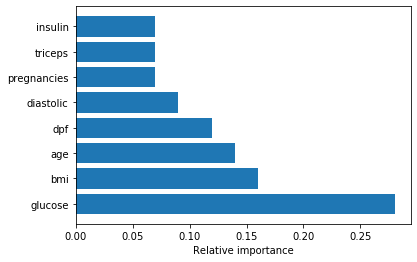

In [64]:
# Plot dette
plt.barh(X.columns[indices], np.round(importances[indices],2))
plt.xlabel("Relative importance")
plt.show()

Glukosenivået har størst forklaringsverdi, etterfulgt av BMI. Det er ikke vanskelig å forestille seg at slik info er nyttig i praksis! 

**MEN:** Feature importances kan fort overtolkes: feature importances fra én enkelt modell kan være svært misvisende. 

Feature importance i random forest-modeller i scikit-learn er basert på å måle hvor effektivt hver feature reduserer usikkerhet (såkalt *impurity* i random forests). Dette vil ofte resultere i et ukorrekt estimat av hvor viktig hver feature *faktisk* er. Se https://explained.ai/rf-importance/index.html for et dypdykk i dette. 

En mer robust teknikk er såkalt **permutation importance**

## Permutation importance

Ideen bak permutation importance er at om en feature er viktig for prediksjonen så bør tilfeldig omstokking av dataene i tilhørende søyle føre til en drastisk forverring av modellen. Dersom en feature derimot er uviktig vil en slik shuffling ikke bety så mye.

Biblioteket `eli5` inneholder en implementasjon av denne ideen, kompatibel med scikit-learn:

In [65]:
import eli5
from eli5.sklearn import PermutationImportance

/home/arvid/anaconda3/envs/bmed360v2020/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/home/arvid/anaconda3/envs/bmed360v2020/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


In [66]:
perm = PermutationImportance(rf, random_state=42).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.1031 ± 0.0576,glucose
0.0187 ± 0.0083,bmi
0.0104 ± 0.0114,insulin
0.0083 ± 0.0169,dpf
-0.0073 ± 0.0156,triceps
-0.0115 ± 0.0202,pregnancies
-0.0146 ± 0.0305,diastolic
-0.0188 ± 0.0214,age


Vi ser at `glucose` er aller viktigst. Om en shuffler `glucose` minker modellens accuracy med nesten 10 prosentpoeng. De fire featuresene som fikk negativ vekt er veldig uviktige for prediksjonene: om en shuffler disse tilfeldig kan en faktisk oppnå _bedre_ resultater!

## Partial dependence plots

PDP er en annen nyttig metode for å tolke prediksjoner fra maskinlæringsmodeller. Ideen er å plotte prediksjoner mens verdiene til en spesifisert feature økes. For eksempel, hva hender med predikert sannsynlighet for diabetes om glukose-nivået økes? Siden dette er en viktig feature forventer vi ganske store endringer (faktisk, siden det er diabetes vi studerer forventer vi at sannsynligheten øker). Og hva med uviktige features?

Vi kan bruke biblioteket `PDPbox`, som er kompatibelt med scikit-learn (se https://pdpbox.readthedocs.io/en/latest for detaljer):

In [67]:
from pdpbox import pdp

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


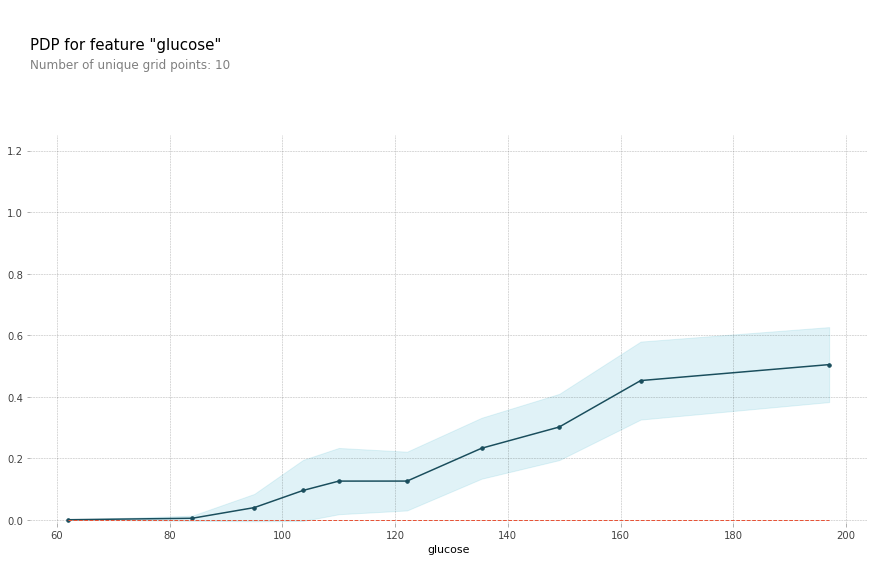

In [68]:
pdp_goals = pdp.pdp_isolate(model=rf, dataset=X_test, model_features=X_test.columns.tolist(), feature='glucose')
pdp.pdp_plot(pdp_goals, 'glucose')
plt.show()

Som forventet: økt glukosenivå fører til økt predikert sannsynlighet for diabetes.

Det samme gjelder BMI:

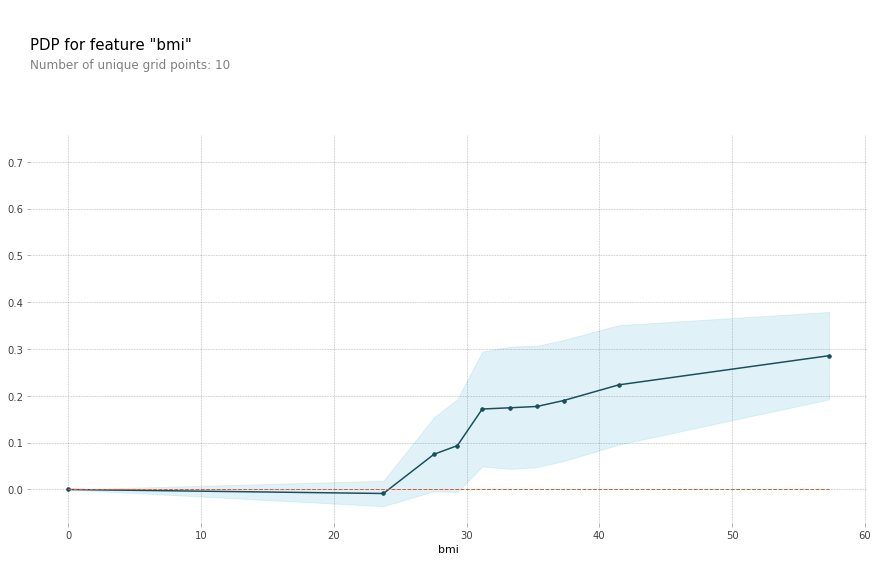

In [69]:
pdp_goals = pdp.pdp_isolate(model=rf, dataset=X_test, model_features=X_test.columns.tolist(), feature='bmi')
pdp.pdp_plot(pdp_goals, 'bmi')
plt.show()

Plottet for alder viser hvorfor denne featuren var uviktig: predikert sannsynlighet øker litt i starten (lav alder), men så flater den ut:

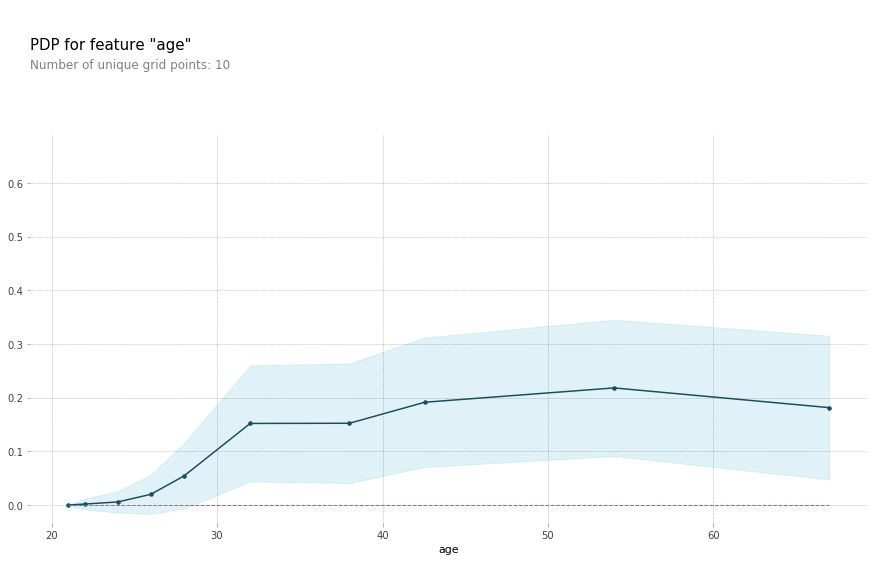

In [70]:
pdp_goals = pdp.pdp_isolate(model=rf, dataset=X_test, model_features=X_test.columns.tolist(), feature='age')
pdp.pdp_plot(pdp_goals, 'age')
plt.show()

### Two-dimensional PDP: interaction between variables

Siden det typisk er kombinasjoner av variabler, ikke enkeltvariabler, som influerer prediksjoner kan det være nyttig å studere to-dimensjonale plots av interaksjonen mellom to variabler og resulterende predikert sannsynlighet:

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


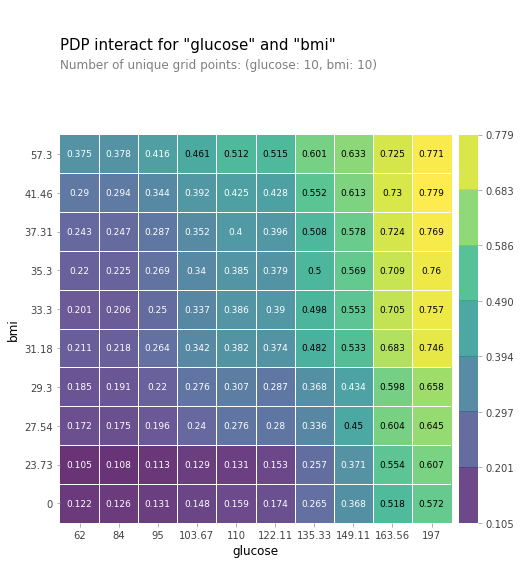

In [71]:
features = ['glucose', 'bmi']
interact  =  pdp.pdp_interact(model=rf, dataset=X_test, model_features=X_test.columns.tolist(), features=features)

pdp.pdp_interact_plot(pdp_interact_out=interact, feature_names=features, plot_type='grid')
plt.show()

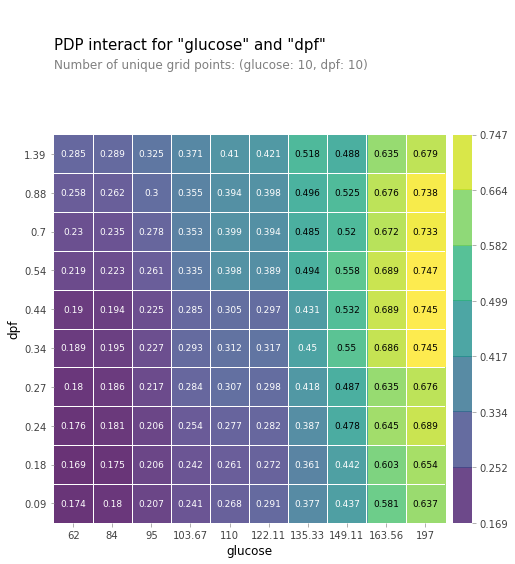

In [72]:
features = ['glucose', 'dpf']
interact  =  pdp.pdp_interact(model=rf, dataset=X_test, model_features=X_test.columns.tolist(), features=features)

pdp.pdp_interact_plot(pdp_interact_out=interact, feature_names=features, plot_type='grid')
plt.show()

> **MERK:** Disse konklusjone er selvfølgelig avhengig av datasettet vi studerer og modellen vi bruker. For å konkludere noe om diabetes og dets relasjon til glukosenivå, BMI, alder, osv, behøver man et nøye sammensatt (og stort) datamateriale.

> **Your turn!**
> - Hent ut feature importances for Iris-prediksjonene. Er det sepal-lengde eller -bredde som gir mest informasjon?
> - Konstruer en annen random forest ved å bytte ut random_state. Hva skjer med accuracy? Hva skjer med feature importances?
> - Forsøk å lage bedre random forest-modeller ved å endre på parametre. (Om du ønsker et dypdykk, bruk grid_search http://scikit-learn.org/stable/modules/grid_search.html til å finne gode parametre.)
> - Forsøk en annen klassifikasjonsmodell fra scikit-learn.
> - Bruk det du har lært hittil til å studere datasettet [Breast cancer wisconsin](https://scikit-learn.org/stable/datasets/index.html#breast-cancer-dataset):
> - **Ekstrautfordring**: Her er et annet godt tilrettelagt datasett: https://assets.datacamp.com/production/course_1939/datasets/auto.csv. Last det ned og repeter prosedyren over. Målet er å predikere bilers opprinnelsesland gitt diverse features.

In [73]:
# Hint til nest-siste oppgave over:
#from sklearn.datasets import load_breast_cancer
#breast = load_breast_cancer()
#X, y = breast['data'], breast['target']

# Machine learning models are highly generic!

> **Important!** Notice that the way we studied the diabetes data was essentially identical to what we did for Iris!

This was our Iris code:

In [1]:
# Load the data
iris_dataset = load_iris()
X = iris_dataset['data'][:, [0, 1]]
y = iris_dataset['target']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Import and train a machine learning model
rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)

# Predict on the test data
y_pred = rf.predict(X_test)

# Evaluate the model
accuracy_score(y_test, y_pred)

NameError: name 'load_iris' is not defined

Here's the code for diabetes:

In [ ]:
# Load the data
diabetes = pd.read_csv('data/diabetes.csv')
X = diabetes[diabetes.columns[0:-1]] 
y = diabetes['diabetes']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Import and train a machine learning model
rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)

# Predict on the test data
y_pred = rf.predict(X_test)

# Evaluate the model
accuracy_score(y_test, y_pred)

**The only difference is that we changed the data!** 

> **Machine learning models are generic: the same model can be used for many different tasks!**